In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
pandas version: 0.22.0
matplotlib version: 2.1.2
NumPy version: 1.15.2
SciPy version: 1.0.0
IPython version: 7.4.0
scikit-learn version: 0.19.1
-------------------------


In [123]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


dfS = pd.read_csv("train.csv")
dfT = pd.read_csv("test.csv")

In [124]:
dfS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
#1 仮説を立てる

# データを眺めて、なんなとなく生死には、
# 年齢(Age)、男か女(Sex)、客室等級(Pclass)の３つが効いているのではないか

In [126]:
#2 前処理を行う

# #1で使うと決めたデータに「欠損値」、「外れ値」がないか確認、修正

In [127]:


#  まずAgeにNullが何個あるか調べる 
dfS['Age'].isnull().values.sum() 

# データフレーム（以下DF）のプロパティ・メソッド
# isnull()でnullはTrue,nullでないならFalseにDFの中身を書き換える　⇒　返値はDF
# valuesでDFをnp.arrayに変換する　⇒返値はnp.array
# Trueは1, Falseは0として扱われるのでnp.sum()を使うことでTrueのカウントをする
# ただし、np.count_nonzero()のほうが高速

177

In [128]:
np.count_nonzero(dfS['Age'].isnull().values)

177

In [129]:


# nullがどれくらいの割合であるのかを調べる

dfS['Age'].isnull().values.sum() / len(dfS['Age']) * 100

19.865319865319865

In [130]:


# 19%。。。これは少し多い気が。。。何かしらの値で埋めたいですね

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

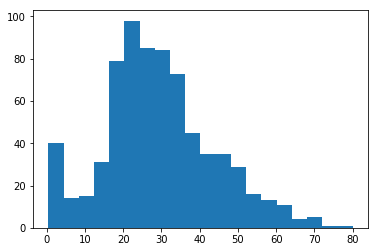

In [131]:


# 次に外れ値がないかチェック

plt.hist(dfS['Age'].dropna(),bins=20)

# ヒストグラムで十分確認できる dropna()でNaNを省いていないとエラーが出る
# bins	ビン (表示する棒) の数。階級数。(デフォルト値: 10) つまり20本棒を表示させている

In [132]:


# 外れ値はない（0歳から80歳までなので）

In [133]:


# 外れ値はないが欠損値が19%もあるとわかった
# 欠損値をどうするかであるが、今回は平均の年齢で埋めることにする

mean = np.mean(dfS['Age'])
dfS['Age'] = dfS['Age'].fillna(mean)

# fillna(値)でNaNに値を入れられる

In [134]:
dfS['Age'].isnull().values.sum()
#埋まっていることが確認できた

0

In [135]:


# 年齢が終わったので次に性別についてみる
dfS['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [136]:
dfS['Sex'] = dfS['Sex'].str.replace('female','2')
dfS['Sex'] = dfS['Sex'].str.replace('male','1')
# 文字列は扱いのが面倒なので数値に置き換えする
# .strで文字列に対するプロパティが使えるので続けて.replace(置き換える文字列, 変更後文字列)で置換する

In [137]:
dfS['Sex'].head()

0    1
1    2
2    2
3    2
4    1
Name: Sex, dtype: object

In [138]:
dfS_sex = dfS['Sex'].astype(int)
dfS_sex[(dfS_sex != 1) & (dfS_sex != 2)]
# これも欠損値、外れ値がないかチェック

# DFの条件絞り込みの注意点は以下の二つ。
# &、|、~を使う（and、or、notだとエラー）
# 比較演算子を使うときは条件ごとに括弧で囲む（括弧がないとエラー）

Series([], Name: Sex, dtype: int32)

In [139]:


# femaleでもmaleでもない文字列のデータはなかったということがわかったので前処理不要

In [140]:


# 次客室階級Pclassを見る
dfS['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [141]:
dfS_pclass = dfS['Pclass']
dfS_pclass[(dfS_pclass != 1) & (dfS_pclass != 2) & (dfS_pclass != 3)]

Series([], Name: Pclass, dtype: int64)

In [142]:


# Pclassが1,2,3以外のものはなかったので前処理不要

In [143]:
#3 機械学習モデルを選択して学習を行う

# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
# ↑を元にどのモデルを選択すればよいかを見る
# 今回はSVCが良いと分かった

In [144]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [145]:


# トレーニングデータを説明変数(X)と目的変数(y)に分割
X = pd.DataFrame({     'Pclass':dfS['Pclass'],
                       'Sex':dfS['Sex'],
                       'Age':dfS['Age']})
y = pd.DataFrame({'Survived':dfS['Survived']})

In [146]:


# 学習用データと検証用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

In [147]:


# 学習させる
model = SVC(kernel='linear', random_state=None,C=0.1)
model.fit(X_train, y_train.values.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:

# テストしてスコアの確認
model.score(X_test,y_test)

0.7835820895522388

In [149]:


# 79%はまずまず...といった感じだな

In [150]:


### テストデータの前処理（同じことを行う）
mean = np.mean(dfT['Age'])
dfT['Age'] = dfT['Age'].fillna(mean)

dfT['Sex'] = dfT['Sex'].str.replace('female','2')
dfT['Sex'] = dfT['Sex'].str.replace('male','1')

Xtest = pd.DataFrame({     'Pclass':dfT['Pclass'],
                       'Sex':dfT['Sex'],
                       'Age':dfT['Age']})

In [151]:


# 予測
model.predict(Xtest)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [152]:

# 予測できたので、これを提出する処理を行う


# データの整形
submitPre = pd.DataFrame({
                        'PassengerId':dfT['PassengerId'],
                        'Survived':model.predict(Xtest)
                        })
# CSV出力
submitPre.to_csv("gender_submission.csv",index=False)